In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (8, 5)

In [ ]:
df=pd.read_csv(r"/content/train(1)(train(1)).csv")
print(df.shape,df.columns)
df

(16209, 21) Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [ ]:
test_df=pd.read_csv(r'/content/test2(test(1)).csv')
test_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,7732500270,20140925T000000,4,2.50,2820,15000,2.0,0,0,4,9,2820,0,1985,0,98052,47.7255,-122.101,2440,15000
5400,3856903515,20141222T000000,3,2.00,1460,6250,1.5,0,0,4,7,1460,0,1912,0,98103,47.6693,-122.333,1690,4750
5401,2557000400,20150409T000000,3,2.50,2070,9900,1.0,0,0,3,8,1420,650,1979,0,98023,47.2988,-122.371,2070,8250
5402,4386700135,20141114T000000,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


#EDA

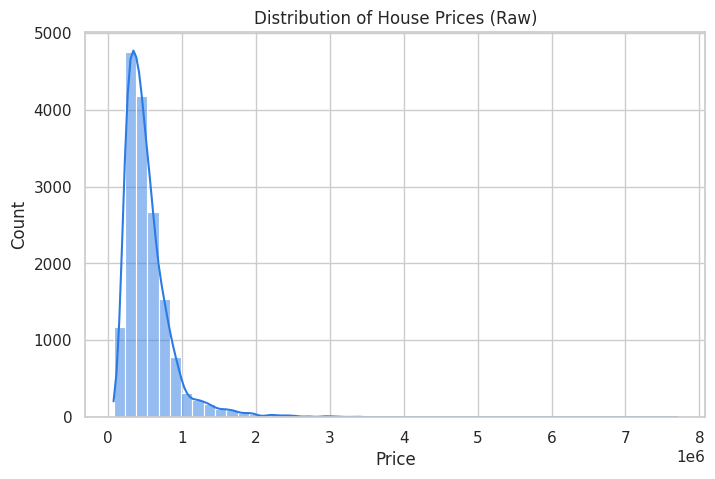

In [ ]:
plt.figure()
sns.histplot(df["price"], bins=50, kde=True, color="#2C7BE5")
plt.title("Distribution of House Prices (Raw)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


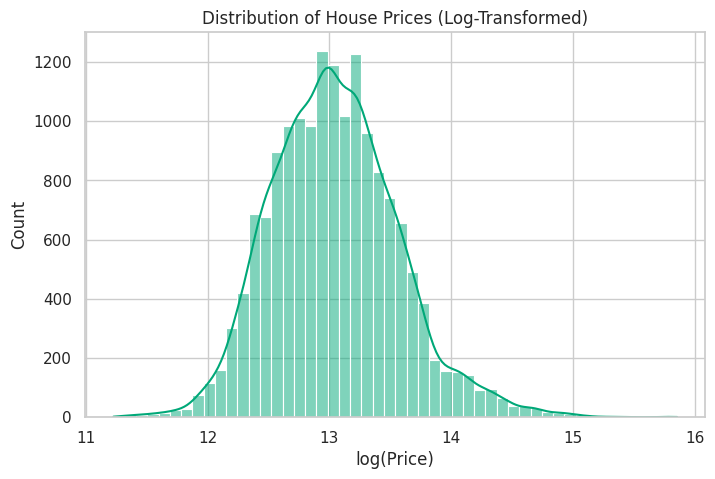

In [ ]:
zdf["log_price"] = np.log1p(df["price"])
plt.figure()
sns.histplot(df["log_price"], bins=50, kde=True, color="#00A878")
plt.title("Distribution of House Prices (Log-Transformed)")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()


House prices are heavily right-skewed; log transformation produces a near-normal distribution suitable for regression.

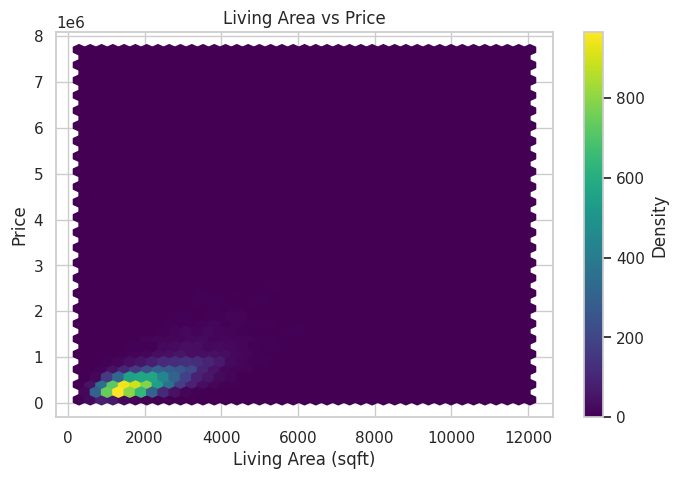

In [ ]:
plt.figure()
plt.hexbin(df["sqft_living"], df["price"], gridsize=40, cmap="viridis")
plt.colorbar(label="Density")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Living Area vs Price")
plt.show()

House prices generally increase with living area, with higher density concentrated in smaller-to-mid sized homes and a sparse tail of large, high-priced properties.

/tmp/ipython-input-4287784584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


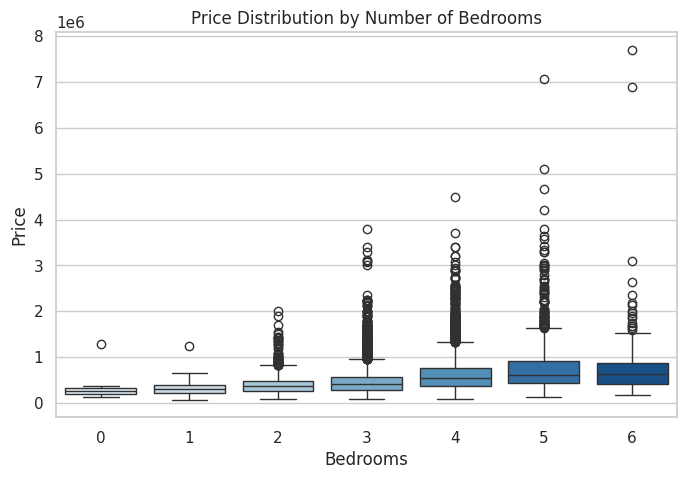

In [ ]:
plt.figure()
sns.boxplot(
    x="bedrooms",
    y="price",
    data=df[df["bedrooms"] <= 6],
    palette="Blues"
)
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

Median house prices increase with the number of bedrooms, while higher bedroom counts show greater variance and more high-value outliers.

/tmp/ipython-input-652791787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


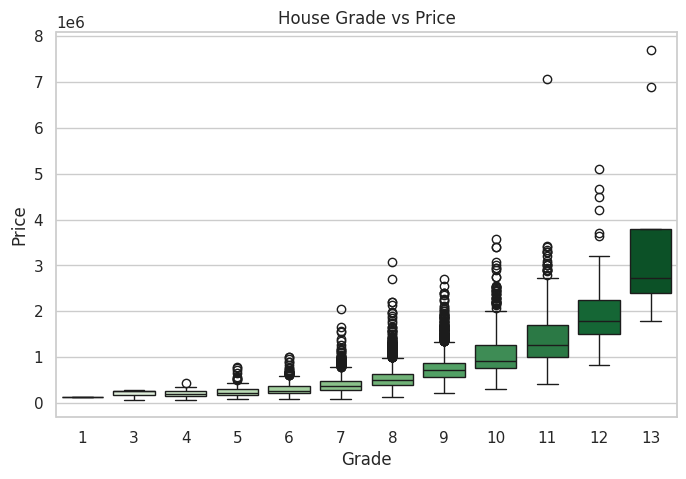

In [ ]:
plt.figure()
sns.boxplot(
    x="grade",
    y="price",
    data=df,
    palette="Greens"
)
plt.title("House Grade vs Price")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()


House prices increase sharply with grade, indicating that construction quality and finish are strong predictors of property value.

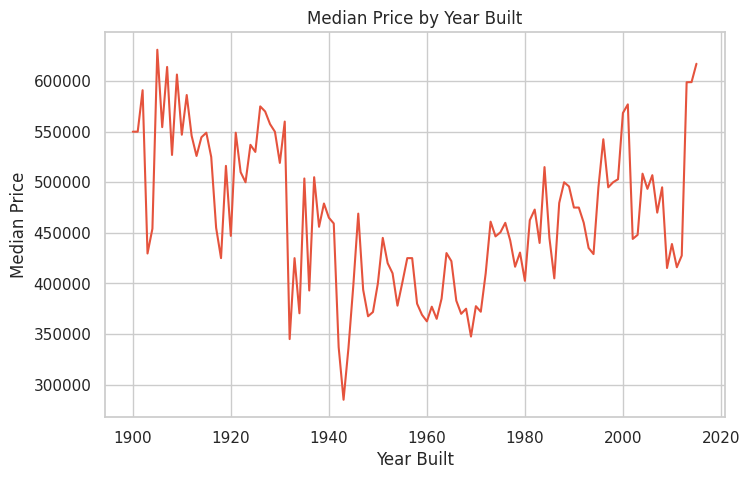

In [ ]:
df_year = df.groupby("yr_built")["price"].median().reset_index()

plt.figure()
sns.lineplot(
    x="yr_built",
    y="price",
    data=df_year,
    color="#E5533D"
)
plt.title("Median Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Median Price")
plt.show()

Newer properties generally command higher median prices, while older homes show greater variability due to differences in renovation, location, and construction quality.

/tmp/ipython-input-3170017289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


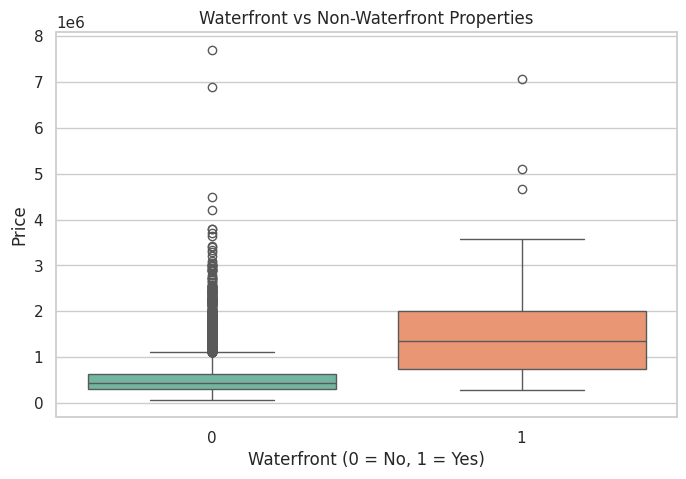

In [ ]:
plt.figure()
sns.boxplot(
    x="waterfront",
    y="price",
    data=df,
    palette="Set2"
)
plt.title("Waterfront vs Non-Waterfront Properties")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()

Waterfront properties have significantly higher median prices and wider price dispersion compared to non-waterfront homes, highlighting the strong premium associated with waterfront locations.

In [ ]:
print(df.columns)
df

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,12.501142
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,12.409018
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,12.206078
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,1150,90,2009,0,98027,47.5321,-122.073,1240,750,12.772806
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,12.354497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,1000,0,1947,0,98125,47.7144,-122.319,1000,6947,12.842652
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,3087,0,2014,0,98023,47.2974,-122.349,2927,5183,12.899097
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,2120,0,2004,0,98053,47.6810,-122.032,1690,2650,13.262127
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,380,0,1963,0,98168,47.4810,-122.323,1170,15000,12.409018


#Feature Engineering

Additional domain-driven features were created to improve model expressiveness:

- **Total area:** Combined above-ground and basement square footage, with outlier clipping  
- **Basement indicator:** Binary flag for presence of a basement  
- **House age:** Derived from year built  
- **Renovation features:** Renovation flag and years since last renovation  
- **Density ratios:** Bedrooms per square foot and relative living size  
- **Categorical casting:** Floor count converted to categorical form  

All transformations were applied consistently to both training and test datasets.








In [ ]:
df["total_sqft"] = df["sqft_above"] + df["sqft_basement"]
test_df["total_sqft"] = test_df["sqft_above"] + test_df["sqft_basement"]

df["total_sqft"] = df["total_sqft"].clip(0, df["total_sqft"].quantile(0.99))
test_df["total_sqft"] = test_df["total_sqft"].clip(0, test_df["total_sqft"].quantile(0.99))

df["has_basement"] = (df["sqft_basement"] > 0).astype(int)
test_df["has_basement"] = (test_df["sqft_basement"] > 0).astype(int)

df["house_age"] = 2015 - df["yr_built"]
test_df["house_age"] = 2015 - test_df["yr_built"]

df["was_renovated"] = (df["yr_renovated"] > 0).astype(int)
test_df["was_renovated"] = (test_df["yr_renovated"] > 0).astype(int)

df["years_since_renovation"] = np.where(
    df["yr_renovated"] > 0,
    2015 - df["yr_renovated"],
    df["house_age"]
)
test_df["years_since_renovation"] = np.where(
    test_df["yr_renovated"] > 0,
    2015 - test_df["yr_renovated"],
    test_df["house_age"]
)

df["bedrooms_per_sqft"] = df["bedrooms"] / (df["sqft_living"] + 1)
test_df["bedrooms_per_sqft"] = test_df["bedrooms"] / (test_df["sqft_living"] + 1)

df["relative_living_size"] = df["sqft_living"] / (df["sqft_living15"] + 1)
test_df["relative_living_size"] = test_df["sqft_living"] / (test_df["sqft_living15"] + 1)

df["relative_living_size"] = df["relative_living_size"].clip(0, 3)
test_df["relative_living_size"] = test_df["relative_living_size"].clip(0, 3)

df["floors_cat"] = df["floors"].astype(str)
test_df["floors_cat"] = test_df["floors"].astype(str)

## Location Clustering (K-Means)

Properties were clustered using K-Means on latitude and longitude to capture spatial price patterns.  
These clusters serve as location-based features representing neighborhood-level effects.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
coords = df[["lat", "long"]].values
coords_test = test_df[["lat", "long"]].values
inertias = []
K = range(2, 16)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)
    inertias.append(kmeans.inertia_)

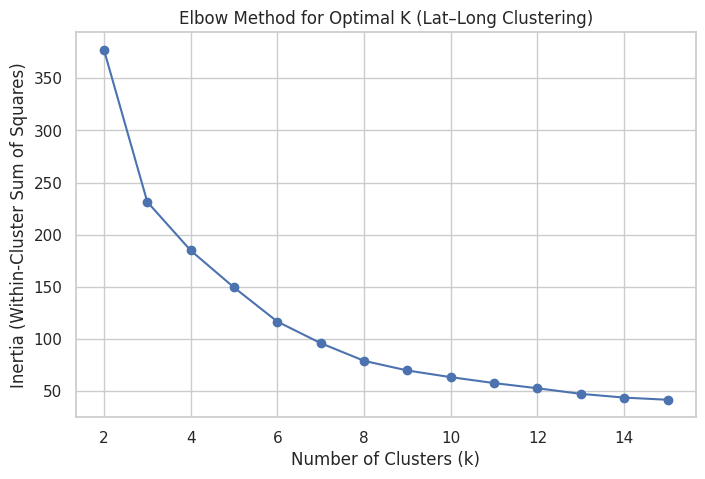

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K (Lat–Long Clustering)")
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 7

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df["location_cluster"] = kmeans_final.fit_predict(coords)
test_df["location_cluster"] = kmeans_final.predict(coords_test)

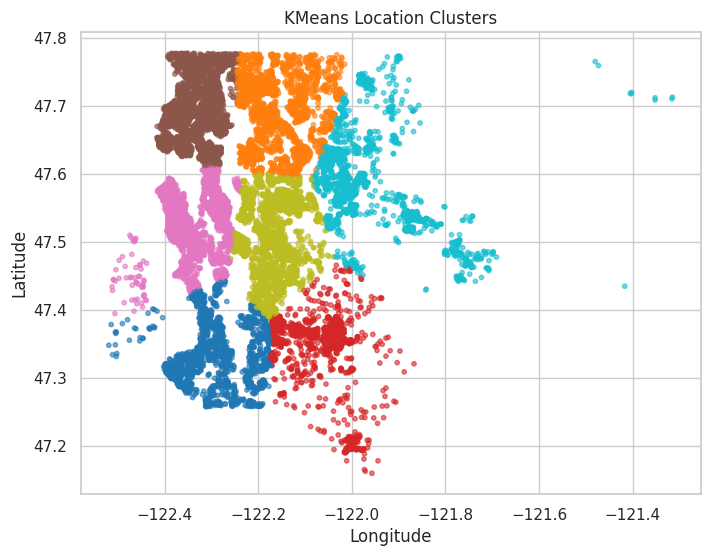

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["long"], df["lat"],
    c=df["location_cluster"],
    cmap="tab10",
    s=10, alpha=0.6
)
plt.title("KMeans Location Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price', 'total_sqft',
       'has_basement', 'house_age', 'was_renovated', 'years_since_renovation',
       'bedrooms_per_sqft', 'relative_living_size', 'floors_cat',
       'location_cluster'],
      dtype='object')

In [ ]:
test_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_sqft', 'has_basement',
       'house_age', 'was_renovated', 'years_since_renovation',
       'bedrooms_per_sqft', 'relative_living_size', 'floors_cat',
       'location_cluster'],
      dtype='object')

In [ ]:
df.drop(['id', 'date','sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'sqft_lot15','floors'],inplace=True,axis=1)
test_ids = test_df["id"].copy()
test_df.drop(['id', 'date','sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'sqft_lot15','floors'],inplace=True,axis=1)

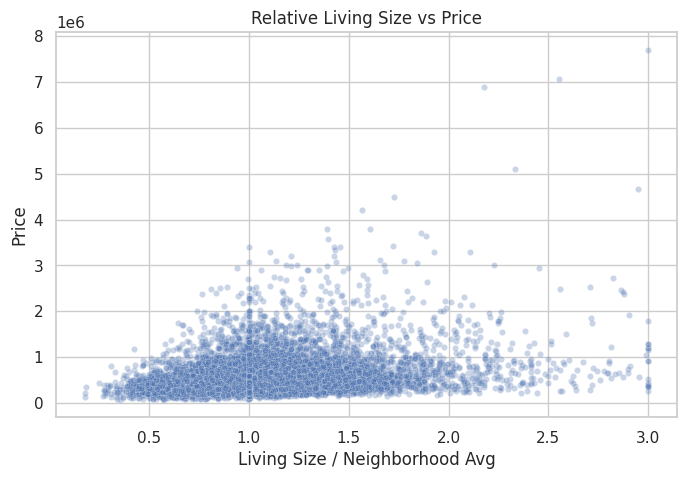

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="relative_living_size",
    y="price",
    data=df,
    alpha=0.3,
    s=20
)
plt.title("Relative Living Size vs Price")
plt.xlabel("Living Size / Neighborhood Avg")
plt.ylabel("Price")
plt.show()

/tmp/ipython-input-4205494654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


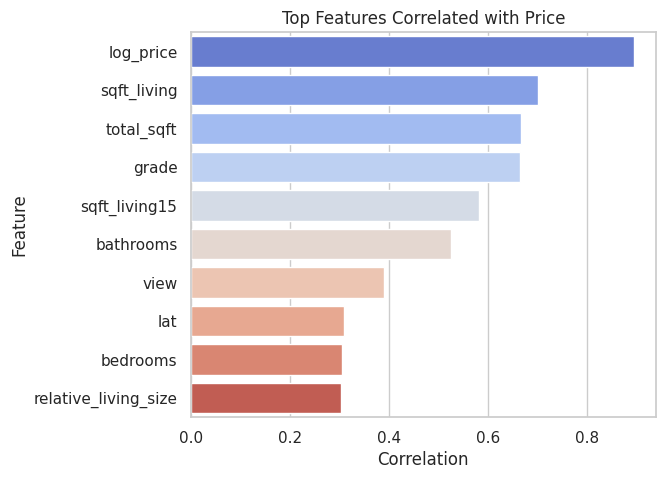

In [ ]:
corr = df.corr(numeric_only=True)["price"].sort_values(ascending=False)

plt.figure(figsize=(6,5))
sns.barplot(
    x=corr.values[1:11],
    y=corr.index[1:11],
    palette="coolwarm"
)
plt.title("Top Features Correlated with Price")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


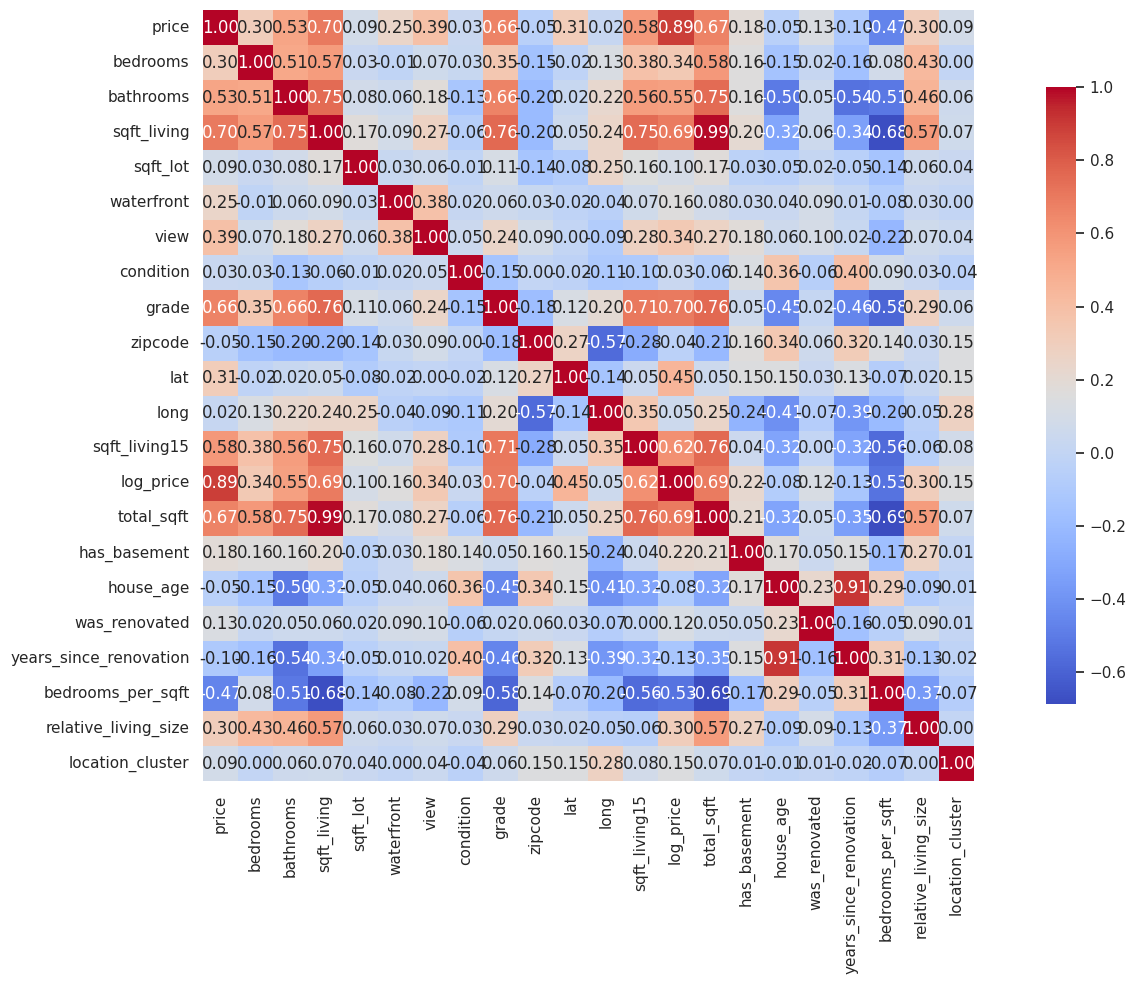

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.tight_layout()
plt.show()

In [ ]:
!pip install catboost -q

In [ ]:
df["floors_cat"] = df["floors_cat"].astype("category").cat.codes
test_df["floors_cat"] = test_df["floors_cat"].astype("category").cat.codes

df["location_cluster"] = df["location_cluster"].astype("category").cat.codes
test_df["location_cluster"] = test_df["location_cluster"].astype("category").cat.codes

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'sqft_living15', 'log_price', 'total_sqft', 'has_basement', 'house_age',
       'was_renovated', 'years_since_renovation', 'bedrooms_per_sqft',
       'relative_living_size', 'floors_cat', 'location_cluster'],
      dtype='object')

## Advanced Feature Engineering

Additional interaction and aggregation features were introduced to capture non-linear relationships:

- **Zip-level aggregates:** Mean and median living area per ZIP code  
- **Room normalization:** Living area per room and bathroom-to-bedroom ratio  
- **Relative size ratios:** Living area normalized by nearby properties  
- **Spatial interaction:** Latitude–longitude product  
- **Feature interactions:** Age–area and grade–area interactions  

All infinite and missing values were handled consistently across train and test sets.


In [ ]:

df['zip_sqft_mean']    = df.groupby('zipcode')['sqft_living'].transform('mean')
test_df['zip_sqft_mean']    = test_df.groupby('zipcode')['sqft_living'].transform('mean')

df['zip_sqft_median']  = df.groupby('zipcode')['sqft_living'].transform('median')
test_df['zip_sqft_median']  = test_df.groupby('zipcode')['sqft_living'].transform('median')

df['sqft_per_room'] = df['sqft_living'] / (df['bedrooms'] + df['bathrooms'] + 1)
test_df['sqft_per_room'] = test_df['sqft_living'] / (test_df['bedrooms'] + test_df['bathrooms'] + 1)

df['sqft_ratio'] = df['sqft_living'] / (df['sqft_living15'] + 1)
test_df['sqft_ratio'] = test_df['sqft_living'] / (test_df['sqft_living15'] + 1)

df['lat_long_product'] = df['lat'] * df['long']
test_df['lat_long_product'] = test_df['lat'] * test_df['long']
# Age interactions
df['age_sqft_interaction'] = df['house_age'] * df['sqft_living']
test_df['age_sqft_interaction'] = test_df['house_age'] * test_df['sqft_living']
# Grade interactions
df['grade_sqft'] = df['grade'] * df['sqft_living']
test_df['grade_sqft'] = test_df['grade'] * test_df['sqft_living']
# Room ratio
df['bath_per_bed'] = df['bathrooms'] / (df['bedrooms'] + 1)
test_df['bath_per_bed'] = test_df['bathrooms'] / (test_df['bedrooms'] + 1)

df = df.replace([np.inf, -np.inf], np.nan).fillna(0)
test_df = test_df.replace([np.inf, -np.inf], np.nan).fillna(0)

## Modeling

Multiple tree-based regression models were trained using the engineered feature set.  
Model performance was evaluated using cross-validation and RMSE on the log-transformed target.


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['price','log_price',], axis=1)
y = df['log_price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Hyperparameter Tuning

Multiple tree-based regression models were trained using **GridSearchCV** with 5-fold cross-validation.

- Models evaluated: Random Forest, XGBoost, LightGBM, CatBoost  
- Hyperparameters tuned using predefined grids  
- Evaluation metric: **RMSE** on the log-transformed target  
- Best parameters selected based on cross-validated performance


In [ ]:
model_grid = {
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [200],
            "max_depth": [10, 20, None],
            "max_features": ["sqrt", "log2"]
        }
    },

    "XGBoost": {
        "model": XGBRegressor(
            objective="reg:squarederror",
            random_state=42,
            n_jobs=-1
        ),
        "params": {
            "n_estimators": [300],
            "learning_rate": [0.05, 0.1],
            "max_depth": [4, 6, 8],
        }
    },

    "LightGBM": {
        "model": LGBMRegressor(random_state=42),
        "params": {
            "n_estimators": [300],
            "learning_rate": [0.05, 0.1],
            "max_depth": [-1, 10],
            "num_leaves": [31, 50]
        }
    },

    "CatBoost": {
        "model": CatBoostRegressor(verbose=0, random_state=42),
        "params": {
            "iterations": [300],
            "learning_rate": [0.05, 0.1],
            "depth": [6, 8]
        }
    },

}


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, mp in model_grid.items():
    print(f"\nRunning GridSearchCV for {name}...")

    clf = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=kf,
        scoring='neg_root_mean_squared_error',   # RMSE
        n_jobs=-1
    )

    clf.fit(X_train, y_train)

    print(f"Best params for {name}: {clf.best_params_}")
    print(f"Best RMSE: {-clf.best_score_:.4f}")  # convert from negative


In [ ]:
!pip install optuna -q

CatBoost hyperparameters were optimized using **Optuna (TPE sampler)** with 5-fold cross-validation.

- Objective: minimize **RMSE** on the log-transformed target  
- Search strategy: Bayesian optimization (TPE)  
- Evaluation: mean RMSE across folds  
- Best configuration selected after multiple optimization trials

In [ ]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import numpy as np

# Convert once
X_np = X.values
y_np = y.values

def objective(trial):

    params = {
        "loss_function": "RMSE",
        "iterations": trial.suggest_int("iterations", 300, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 20.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 0.5, 10.0),
        "early_stopping_rounds": 100,
        "verbose": 0,
        "random_seed": 42
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, valid_idx in kf.split(X_np):
        X_train, X_valid = X_np[train_idx], X_np[valid_idx]
        y_train, y_valid = y_np[train_idx], y_np[valid_idx]

        model = CatBoostRegressor(**params)
        model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

        preds = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(y_valid, preds))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)


study = optuna.create_study(direction="minimize", sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=50)

print("Best RMSE:", study.best_value)
print("Best Params:", study.best_params)


In [1]:
#Best Params Are Stored for Faster Computation

In [ ]:
best_params= {'iterations': 1753, 'learning_rate': 0.03902004829239196, 'depth': 7, 'l2_leaf_reg': 2.0549404740339736, 'bagging_temperature': 0.7192483561004641, 'border_count': 129, 'random_strength': 2.6913607174920013}

In [ ]:
cat_model = CatBoostRegressor(**best_params)

cat_model.fit(X_train, y_train)

0:	learn: 0.5106896	total: 8.78ms	remaining: 15.4s
1:	learn: 0.4981483	total: 15.5ms	remaining: 13.6s
2:	learn: 0.4852533	total: 22.2ms	remaining: 12.9s
3:	learn: 0.4733636	total: 28.9ms	remaining: 12.6s
4:	learn: 0.4627852	total: 35.8ms	remaining: 12.5s
5:	learn: 0.4506202	total: 42.5ms	remaining: 12.4s
6:	learn: 0.4401523	total: 49.2ms	remaining: 12.3s
7:	learn: 0.4297479	total: 55.6ms	remaining: 12.1s
8:	learn: 0.4199401	total: 65.3ms	remaining: 12.6s
9:	learn: 0.4108429	total: 71.9ms	remaining: 12.5s
10:	learn: 0.4033108	total: 74.8ms	remaining: 11.8s
11:	learn: 0.3947287	total: 81.5ms	remaining: 11.8s
12:	learn: 0.3861040	total: 89.4ms	remaining: 12s
13:	learn: 0.3783718	total: 103ms	remaining: 12.8s
14:	learn: 0.3707849	total: 122ms	remaining: 14.1s
15:	learn: 0.3629505	total: 153ms	remaining: 16.6s
16:	learn: 0.3554393	total: 172ms	remaining: 17.6s
17:	learn: 0.3489733	total: 192ms	remaining: 18.5s
18:	learn: 0.3430989	total: 213ms	remaining: 19.4s
19:	learn: 0.3366347	total: 23

In [ ]:
y_pred = cat_model.predict(X_test)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    r2_score,
    explained_variance_score
)
import numpy as np
import pandas as pd

# Core metrics
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
evs  = explained_variance_score(y_test, y_pred)

# Percent errors (since log-price target)
# Convert predictions back to actual prices
actual_price = np.expm1(y_test)
pred_price   = np.expm1(y_pred)

mape = np.mean(np.abs((actual_price - pred_price) / actual_price)) * 100

performance = pd.DataFrame({
    "Metric": ["RMSE (log)", "MAE (log)", "Median AE (log)", "R²", "Explained Variance", "MAPE (%)"],
    "Value":  [rmse, mae, medae, r2, evs, mape]
})

print(performance)

               Metric      Value
0          RMSE (log)   0.159702
1           MAE (log)   0.115072
2     Median AE (log)   0.084582
3                  R²   0.907577
4  Explained Variance   0.907635
5            MAPE (%)  11.695945


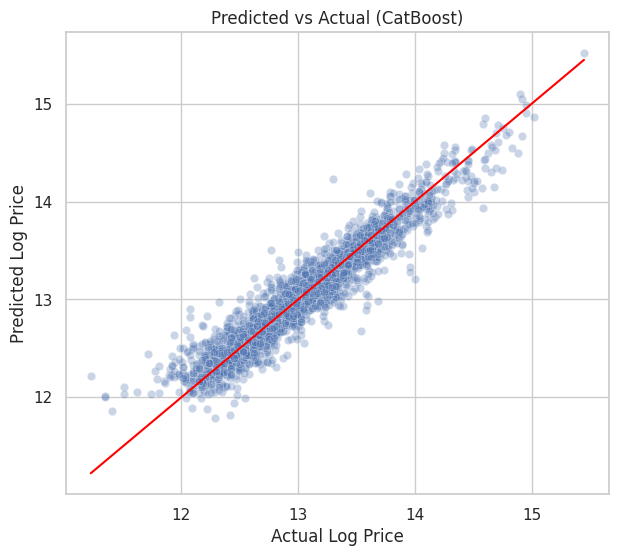

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Predicted vs Actual (CatBoost)")
plt.show()

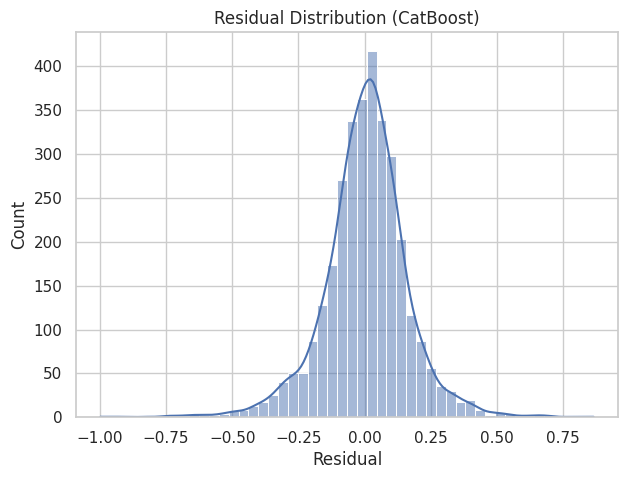

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual Distribution (CatBoost)")
plt.xlabel("Residual")
plt.show()

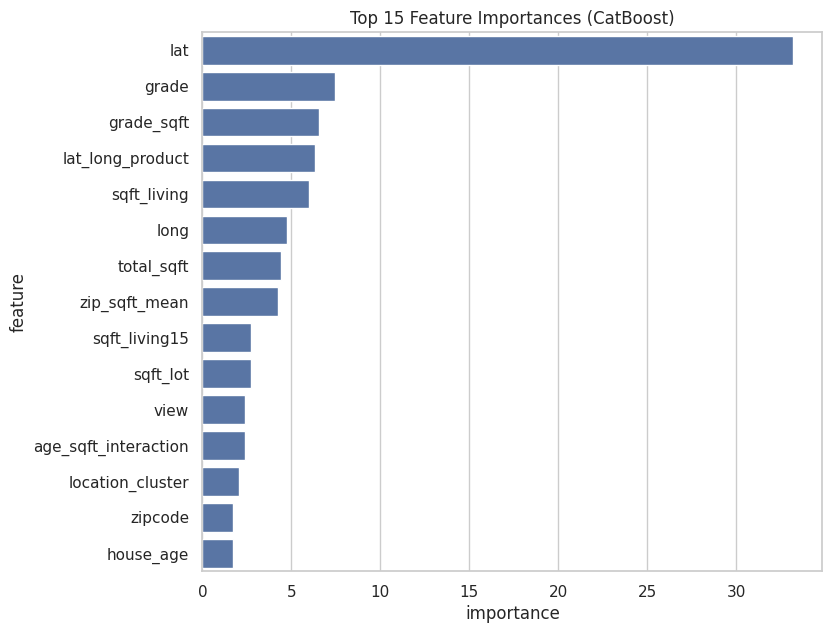

In [ ]:
import pandas as pd

importances = cat_model.get_feature_importance()
feat_names = X_train.columns

imp_df = pd.DataFrame({"feature": feat_names, "importance": importances})
imp_df = imp_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(8,7))
sns.barplot(data=imp_df.head(15), x="importance", y="feature")
plt.title("Top 15 Feature Importances (CatBoost)")
plt.show()


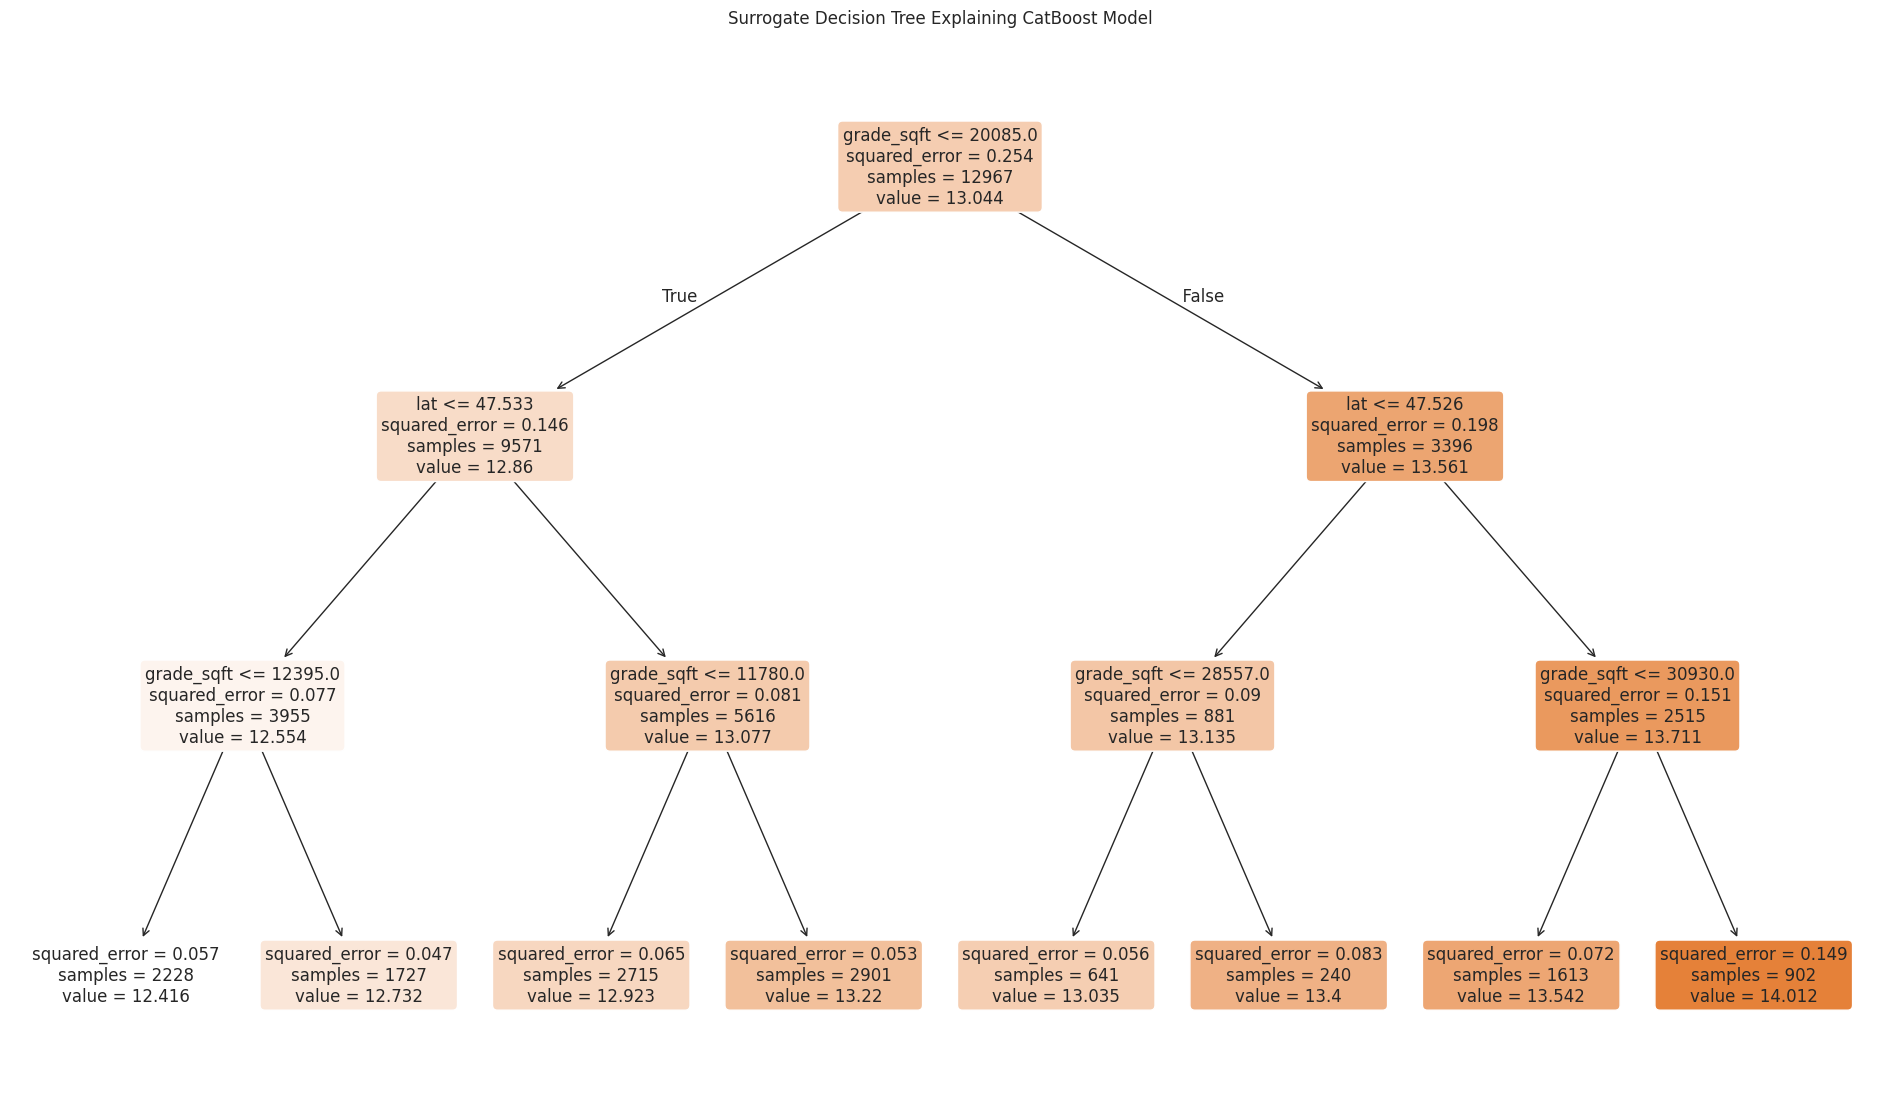

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Surrogate training labels = CatBoost predictions
y_pred_train = cat_model.predict(X_train)

surrogate = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

surrogate.fit(X_train, y_pred_train)
plt.figure(figsize=(24, 14))
plot_tree(
    surrogate,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Surrogate Decision Tree Explaining CatBoost Model")
plt.show()

In [ ]:
test_pred_log = cat_model.predict(test_df)
test_pred_price = np.expm1(test_pred_log)

submission = pd.DataFrame({
    "id": test_ids,
    "predicted_price": test_pred_price
})

submission.to_csv("Prediction_File.csv", index=False)